In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import display # display() ca nbe used to display the dataframe
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')

In [4]:
stats = df.describe
stats

<bound method NDFrame.describe of      Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
2          2       3   6353  ...    2405              3516        7844
3          1       3  13265  ...    6404               507        1788
4          2       3  22615  ...    3915              1777        5185
..       ...     ...    ...  ...     ...               ...         ...
435        1       3  29703  ...   13135               182        2204
436        1       3  39228  ...    4510                93        2346
437        2       3  14531  ...     437             14841        1867
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[440 rows x 8 columns]>

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
#feature importance of milk column
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = df.drop(['Milk'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_data,df['Milk'],test_size=0.25,random_state=101)
regressor = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)
score = regressor.score(X_test,y_test)
score

0.16141329361951973

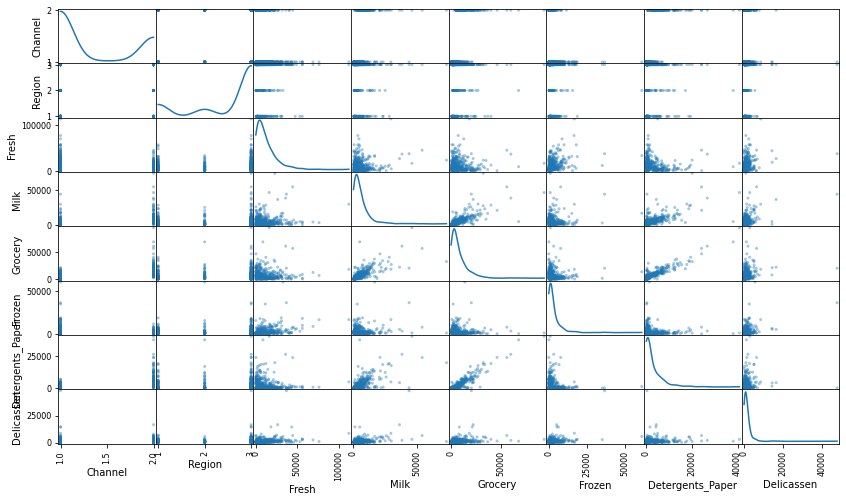

In [7]:
scatter_matrix(df, alpha = 0.4, figsize = (14,8), diagonal = 'kde');

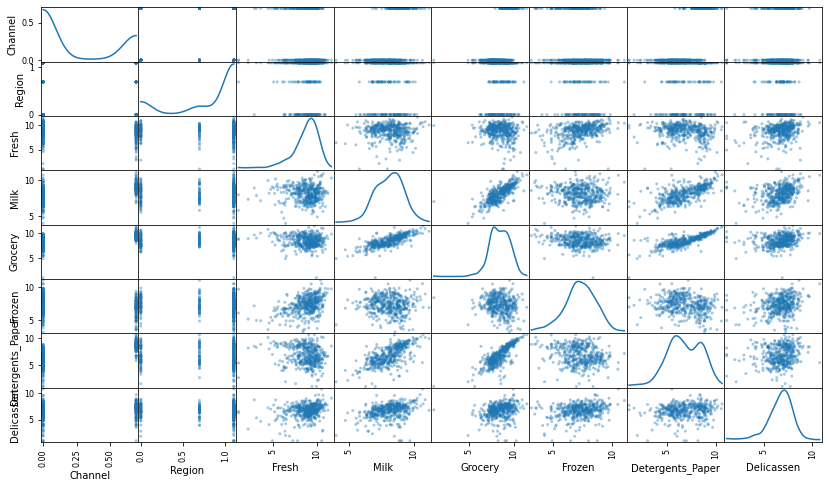

In [11]:
#feature scaling using natural logarithm
indices=[61,149,391]
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
log_data = df.apply(lambda x: np.log(x))
log_samples = samples.apply(lambda x: np.log(x))
scatter_matrix(log_data, alpha = 0.4, figsize = (14,8), diagonal = 'kde');

In [0]:
import itertools

In [13]:
#outliers
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
   
    print ("Data points considered outliers for the feature" +feature+":")
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)

    


#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    


#remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has "+str(len(good_data))+ "observations after removing outliers.")

Data points considered outliers for the featureChannel:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the featureRegion:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,0.000000,0.0,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the featureFresh:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the featureMilk:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,0.693147,1.098612,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,0.000000,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.000000,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the featureGrocery:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the featureFrozen:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,0.000000,0.693147,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the featureDetergents_Paper:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the featureDelicassen:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,0.000000,1.098612,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The good dataset now has 431observations after removing outliers.


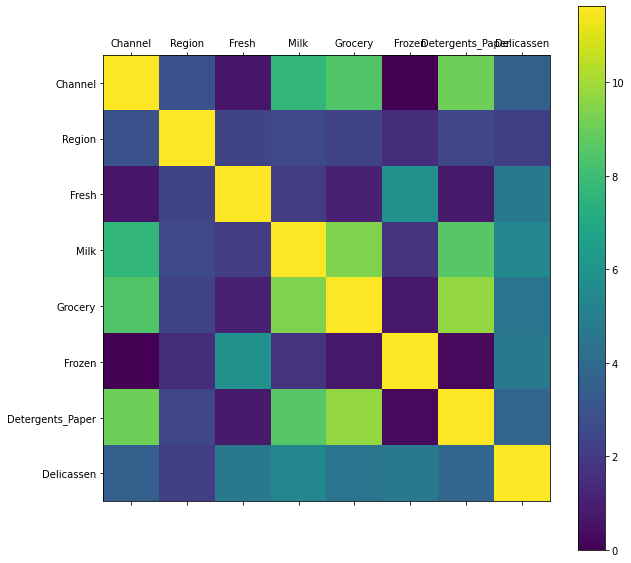

In [14]:
#data visualisation after applying natural logarithm
plot_corr(log_data)

In [0]:
import visualisation as draw

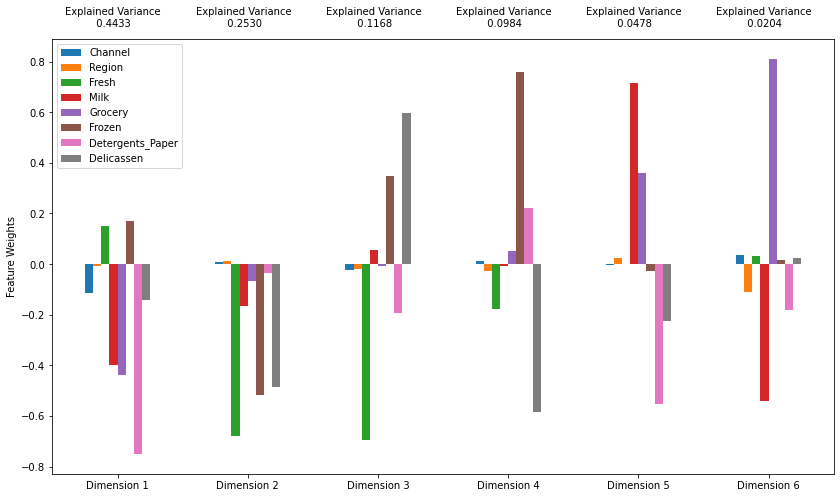

In [24]:
#Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

#Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)
pca_results = draw.pca_results(good_data, pca)

In [0]:
#Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data) #transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in n_clusters:
    
    #Apply clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    print ("The silhouette_score for"+ str(n) +"clusters is"+ str(score)+" ")

The silhouette_score for8clusters is0.25970490208348956 
The silhouette_score for6clusters is0.341693035201778 
The silhouette_score for4clusters is0.24696730814092585 
The silhouette_score for3clusters is0.3427399622211801 
The silhouette_score for2clusters is0.4305238662205695 


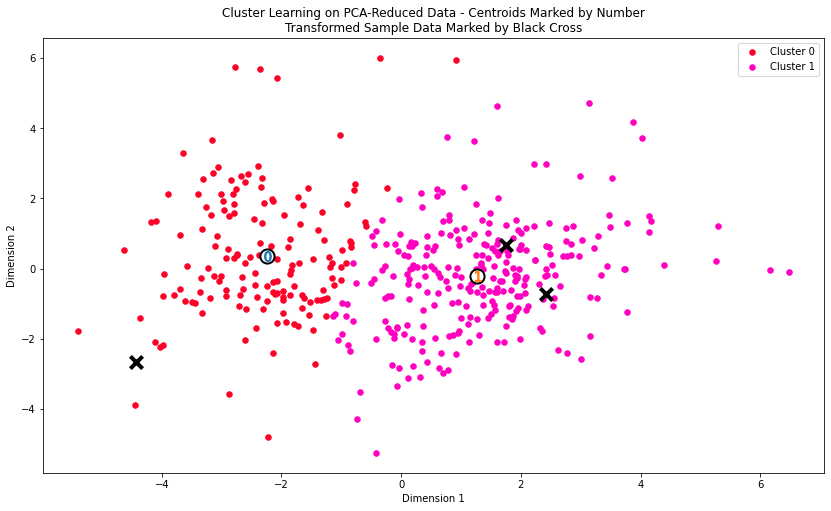

In [36]:
#cluster visualisation
draw.cluster_results(reduced_data, preds, centers, pca_samples)

In [38]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,2.0,2.0,3704.0,7818.0,12216.0,870.0,4715.0,947.0
Segment 1,1.0,2.0,9164.0,2101.0,2737.0,2120.0,345.0,754.0


In [40]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


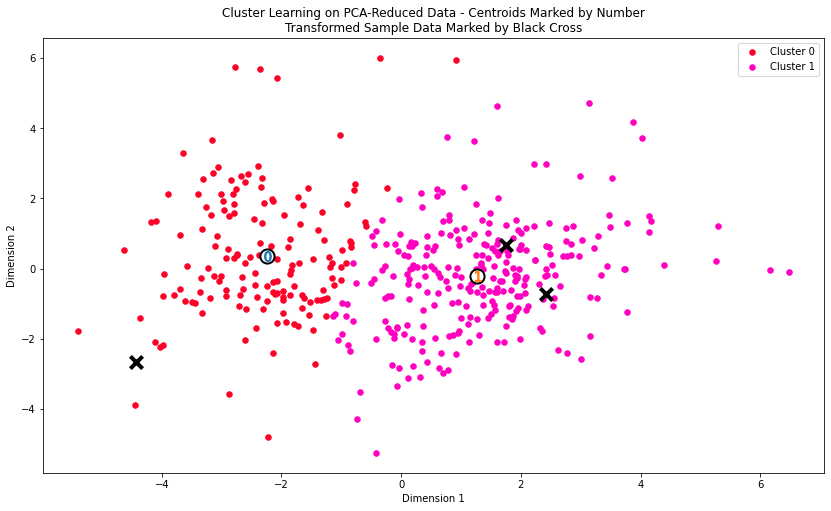

In [42]:
draw.cluster_results(reduced_data, preds, centers, pca_samples)

Segment 0 best represents supermarkets while 
Segment 1 best represents restaurants and cafes 